# Governance Dataset:
The governance dataset has information about not-for-profits such as the number of voting memters and volunteers.  Additionally, it includes a number of boolean datatype fields related to policies or disclosures such as a conflict of interest policy or a conflict disclosure.  The evidence of robust policies and disclosure practices are indicators of organizations with strong internal controls.

In [122]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## IMPORT DATA

In [2]:
# examine all fields
df_all_fields = pd.read_csv('02.data/primary_raw_datasets/Open990_Governance_Snack_Set_Public_2019-01-15.csv', nrows=5)

In [3]:
df_all_fields.head(1)

,ein,name_org,tax_date_begin,tax_date_end,tax_yr,doing_business_as,phone,website,address,city,state,country,zip,org_form.association,org_form.corp,org_form.other_form,org_form.other_form_desc,org_form.trust,formation_yr,grp_exempt_num,state_legaldomicile,grp_return,grp_subs_all_incl,exempt_status.501c3,exempt_status.501c_any,exempt_status.501c_txt,gross_receipts,ntee_code_nccs,ntee_description_nccs,discontinue_dispose25,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,income_tot_unrelated,income_net_unrelated,rev_giftsgrants_tot_prioryr,rev_prgmservice_prioryr,rev_investmt_prioryr,rev_other_prioryr,rev_tot_prioryr,grants_expense_tot_prioryr,benefits_expense_tot_prioryr,salaries_expense_tot_prioryr,fundraiseservfee_expense_tot_prioryr,fundraise_expense_tot_curyr,other_expense_tot_prioryr,expense_tot_prioryr,rev_less_expense_prioryr,asset_tot_beginyr,liability_tot_beginyr,asset_net_beginyr,rev_giftsgrants_tot_curyr,rev_prgmservice_curyr,rev_investmt_curyr,rev_other_curyr,rev_tot_curyr,grants_expense_tot_curyr,benefits_expense_tot_curyr,salaries_expense_tot_curyr,fundraiseservfee_expense_tot_curyr,other_expense_tot_curyr,expense_tot_curyr,rev_less_expense_curyr,asset_tot_endyr,liability_tot_endyr,asset_net_endyr,operate_hospfacility,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy,forms_ownwebsite,comp_currkeypersons_tot,cash_noninterest_endyr,savingtempcash_endyr,pledges_net_endyr,accountreceivable_net_endyr,invest_publicsec_endyr,invest_othersec_endyr,invest_prog_endyr,asset_intangible_endyr,asset_unrestrictnet_endyr,asset_temprestrictnet_endyr,asset_permrestrictnet_endyr,record_id,schema_version,irs_efile_id,random_string
0,391546606,DAYSTAR INC,2017-01-01,2017-12-31,2017,NaN,+1 (414) 385-0334,WWW.DAYSTARINC.ORG,PO BOX 2130,MILWAUKEE,WI,NaN,532012130,NaN,True,NaN,NaN,NaN,1986,NaN,WI,no,NaN,True,NaN,NaN,333897,NaN,NaN,NaN,9,9,8,25.0,4280,0.0,207987,6092,1,-143,213937,0.0,0.0,140200,0.0,21971,92928,233128,-19191,316735,288974,27761,260639,8695,0,4280,273614,0,0,115568,0,115084,230652,42962,325654,254931,70723,no,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN,NaN,16375.0,27988,201.0,17998.0,6009.0,NaN,NaN,NaN,NaN,70723.0,0.0,NaN,391546606_201712,2017v2.2,201831219349300733,MTA0MDA1NjUyMDM1ODQ2NDI1MQ


In [4]:
# identify governance columns of interest to me
list(enumerate(df_all_fields.columns))[68:89]

[(68, 'relationsamongemployees'),
 (69, 'delegate_management'),
 (70, 'material_diversion'),
 (71, 'memb_or_stockholder'),
 (72, 'memb_elect_board'),
 (73, 'decisions_outside_board'),
 (74, 'govern_body_minutes'),
 (75, 'committee_minutes'),
 (76, 'no_officer_address'),
 (77, 'local_chapt'),
 (78, 'policies_ref_chapt'),
 (79, '990_to_members'),
 (80, 'conflict_interest_policy'),
 (81, 'conflict_disclosure'),
 (82, 'enforce_conflict_policy'),
 (83, 'whistleblower_policy'),
 (84, 'doc_retention_policy'),
 (85, 'ceo_comp_review'),
 (86, 'officer_comp_review'),
 (87, 'in_joint_venture'),
 (88, 'joint_venture_policy')]

In [86]:
# add together columns selected by index and those manually selected
cols = list(df_all_fields.iloc[:, 68:89].columns) + ['ein',
  'tax_yr',
   'voting_memb_ct',
   'voting_indepmemb_ct',
   'employee_tot_ct',
   'volunteer_tot_ct',
   'salaries_expense_tot_curyr']

In [87]:
# import only fields of interest to me
df = pd.read_csv('02.data/primary_raw_datasets/Open990_Governance_Snack_Set_Public_2019-01-15.csv', usecols=cols)

In [88]:
df.shape

(1453208, 28)

In [8]:
df.head(5)

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,policies_ref_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,joint_venture_policy
0,391546606,2017,9,9,8,25.0,115568,no,no,no,no,no,no,yes,yes,no,no,NaN,yes,yes,yes,yes,yes,yes,yes,no,no,NaN
1,640901077,2012,15,15,4,NaN,83768,no,no,no,yes,yes,yes,yes,no,no,no,NaN,yes,yes,yes,yes,no,no,no,no,no,NaN
2,522113016,2015,15,15,16,0.0,517577,no,no,no,no,no,no,yes,yes,no,yes,yes,yes,yes,yes,yes,yes,yes,yes,yes,no,NaN
3,454957549,2016,4,0,12,NaN,79260,no,no,no,no,no,no,no,no,no,no,NaN,no,no,no,no,no,no,no,no,no,NaN
4,210502065,2017,28,28,3,0.0,79349,no,no,no,no,yes,no,yes,yes,no,no,NaN,yes,no,NaN,NaN,no,no,yes,no,no,NaN


## CLEAN/ORGANIZE DATA

In [9]:
# examine distribution by years
df.tax_yr.value_counts().sort_index()

2010     97353
2011    138173
2012    169291
2013    189195
2014    208950
2015    226022
2016    237448
2017    178537
2018      8239
Name: tax_yr, dtype: int64

In [89]:
# although I'm only focusing on 2017 in the executive compensation dataset
# only including 2017 here caused me to miss about 3/4 of
# executive compensation payments
# including two prior years allows me to match up with almost 
# all executive compensation payments
df = df[(df.tax_yr == 2017) |
       (df.tax_yr == 2016) |
       (df.tax_yr == 2015)]

In [90]:
df.shape

(642007, 28)

In [12]:
# which fields are more than 60% null?
(df.isnull().mean() * 100)[(df.isnull().mean() * 100) > 60].index

Index(['policies_ref_chapt', 'joint_venture_policy'], dtype='object')

In [91]:
# drop columns that are mostly null
df.drop(['policies_ref_chapt', 
         'joint_venture_policy'], axis=1, inplace=True)

In [14]:
# examine data types of columns
# many of the binary colums are object
# I need to convert to bool
df.dtypes

ein                             int64
tax_yr                          int64
voting_memb_ct                  int64
voting_indepmemb_ct             int64
employee_tot_ct                 int64
volunteer_tot_ct              float64
salaries_expense_tot_curyr      int64
relationsamongemployees        object
delegate_management            object
material_diversion             object
memb_or_stockholder            object
memb_elect_board               object
decisions_outside_board        object
govern_body_minutes            object
committee_minutes              object
no_officer_address             object
local_chapt                    object
990_to_members                 object
conflict_interest_policy       object
conflict_disclosure            object
enforce_conflict_policy        object
whistleblower_policy           object
doc_retention_policy           object
ceo_comp_review                object
officer_comp_review            object
in_joint_venture               object
dtype: objec

In [92]:
# convert object columns to boolean
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column] == 'yes'

In [93]:
# verify results
df.dtypes

ein                             int64
tax_yr                          int64
voting_memb_ct                  int64
voting_indepmemb_ct             int64
employee_tot_ct                 int64
volunteer_tot_ct              float64
salaries_expense_tot_curyr      int64
relationsamongemployees          bool
delegate_management              bool
material_diversion               bool
memb_or_stockholder              bool
memb_elect_board                 bool
decisions_outside_board          bool
govern_body_minutes              bool
committee_minutes                bool
no_officer_address               bool
local_chapt                      bool
990_to_members                   bool
conflict_interest_policy         bool
conflict_disclosure              bool
enforce_conflict_policy          bool
whistleblower_policy             bool
doc_retention_policy             bool
ceo_comp_review                  bool
officer_comp_review              bool
in_joint_venture                 bool
dtype: objec

In [17]:
# examine for null values by percent
df.isnull().mean() * 100

ein                            0.000000
tax_yr                         0.000000
voting_memb_ct                 0.000000
voting_indepmemb_ct            0.000000
employee_tot_ct                0.000000
volunteer_tot_ct              26.682731
salaries_expense_tot_curyr     0.000000
relationsamongemployees        0.000000
delegate_management            0.000000
material_diversion             0.000000
memb_or_stockholder            0.000000
memb_elect_board               0.000000
decisions_outside_board        0.000000
govern_body_minutes            0.000000
committee_minutes              0.000000
no_officer_address             0.000000
local_chapt                    0.000000
990_to_members                 0.000000
conflict_interest_policy       0.000000
conflict_disclosure            0.000000
enforce_conflict_policy        0.000000
whistleblower_policy           0.000000
doc_retention_policy           0.000000
ceo_comp_review                0.000000
officer_comp_review            0.000000


In [94]:
# replace null volunteers with zero
# change data type to int
df.volunteer_tot_ct.fillna(0, inplace=True)
df.volunteer_tot_ct = df.volunteer_tot_ct.astype(int)

In [95]:
df.head()

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
0,391546606,2017,9,9,8,25,115568,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,False,False
2,522113016,2015,15,15,16,0,517577,False,False,False,False,False,False,True,True,False,True,True,True,True,True,True,True,True,True,False
3,454957549,2016,4,0,12,0,79260,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,210502065,2017,28,28,3,0,79349,False,False,False,False,True,False,True,True,False,False,True,False,False,False,False,False,True,False,False
5,473214712,2016,4,4,0,4,0,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,True,False,False,False


In [20]:
df.shape

(642007, 26)

In [96]:
# since I have included multiple years
# select only the latest governance data
# based on ein number
# delete the rest
df = df.sort_values(['ein', 
                     'tax_yr'], ascending=False).drop_duplicates('ein')

In [97]:
df.shape

(269928, 26)

## EDA

In [98]:
# responses to governance questions
list(enumerate(df.columns))

[(0, 'ein'),
 (1, 'tax_yr'),
 (2, 'voting_memb_ct'),
 (3, 'voting_indepmemb_ct'),
 (4, 'employee_tot_ct'),
 (5, 'volunteer_tot_ct'),
 (6, 'salaries_expense_tot_curyr'),
 (7, 'relationsamongemployees'),
 (8, 'delegate_management'),
 (9, 'material_diversion'),
 (10, 'memb_or_stockholder'),
 (11, 'memb_elect_board'),
 (12, 'decisions_outside_board'),
 (13, 'govern_body_minutes'),
 (14, 'committee_minutes'),
 (15, 'no_officer_address'),
 (16, 'local_chapt'),
 (17, '990_to_members'),
 (18, 'conflict_interest_policy'),
 (19, 'conflict_disclosure'),
 (20, 'enforce_conflict_policy'),
 (21, 'whistleblower_policy'),
 (22, 'doc_retention_policy'),
 (23, 'ceo_comp_review'),
 (24, 'officer_comp_review'),
 (25, 'in_joint_venture')]

In [26]:
df.iloc[:,7:]

,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
367394,False,True,False,False,False,False,True,False,False,False,True,True,True,True,False,True,True,False,False
1063015,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
224160,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,False
30093,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
474326,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368372,False,False,False,True,True,True,True,True,False,True,False,True,False,True,True,True,True,False,False
111381,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False
1054428,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False
168672,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False


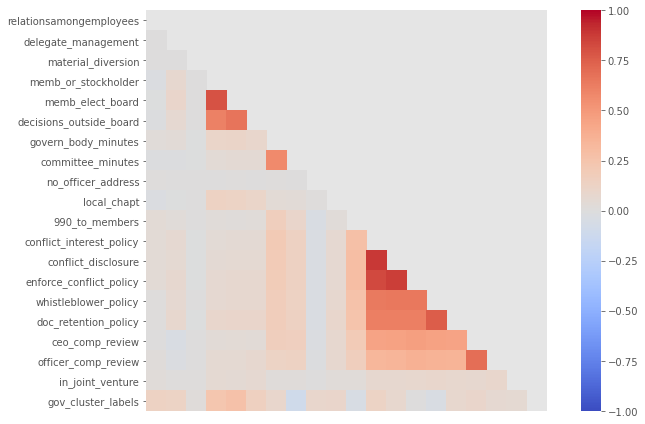

In [124]:
# compare features using a heatmap
plt.figure(figsize=(10, 6))

mask = np.zeros_like(pd.get_dummies(df.iloc[:,7:].corr()), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# sns.heatmap(pd.get_dummies(df[['reportable_comp', 'state']]).corr(),
#             cmap='coolwarm',
#             annot=False,
# #             vmin=-1,
#             square=True,
#             mask = mask);

ax = sns.heatmap(df.iloc[:,7:].corr(), 
                 vmin=-1, vmax=1, center=0, 
                 square=True, 
                 annot=False, 
                 cmap='coolwarm',
                mask = mask)

ax.axes.get_xaxis().set_visible(False)
# ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
# plt.savefig('03.visualizations/gov_heatmap.png');

## CLUSTERING ANALYSIS

In [78]:
# standard scale data before clustering
X = pd.get_dummies(df.loc[:, 'relationsamongemployees':])

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [58]:
# random.choice(X_std.shape[0], 1000, replace=False)

In [67]:
X_std.shape[0] * .25

67482.0

In [68]:
# because of the size of the dataset
# I will subset before I cluster
# randomly choose 50K businesses
# to cluster governance data
X_std = X_std[random.choice(X_std.shape[0], 50000, replace=False), :]

In [69]:
sum_of_squared_distances = []
cluster_count = []

for i in [20, 50, 100, 200, 500, 1000]:
    sum_of_squared_distances.append(KMeans(n_clusters=i).fit(X_std).inertia_)
    cluster_count.append(i)

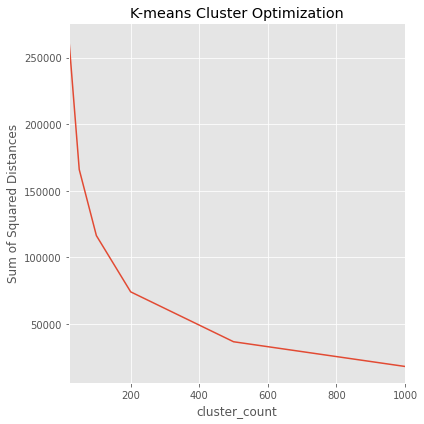

In [117]:
# plot inertia score as it relates to cluster 
# count to determine the best number of clusters
fig, ax = plt.subplots(figsize=(6, 6))

ax = pd.DataFrame(list(list(zip(sum_of_squared_distances, cluster_count))), 
            columns=['sum_of_squared_distances', 'cluster_count']) \
        .sort_values(by=['sum_of_squared_distances'], ascending=False).set_index('cluster_count').plot(ax=ax, legend=False)

plt.ylabel('Sum of Squared Distances')
plt.title('K-means Cluster Optimization')
plt.tight_layout()
# plt.savefig('03.visualizations/cluster_optimization.png');

200 clusters appears to be the most optimal cluster count.

In [79]:
# tune K-means for 200 clusters
labels = KMeans(n_clusters=200).fit_predict(X_std)

In [99]:
df['gov_cluster_labels'] = labels

### Identify the count of governance policies that each organization has

In [36]:
# select columns to aggregate
df.loc[:, 'relationsamongemployees':]

,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture
367394,False,True,False,False,False,False,True,False,False,False,True,True,True,True,False,True,True,False,False
1063015,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
224160,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,False
30093,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False
474326,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1368372,False,False,False,True,True,True,True,True,False,True,False,True,False,True,True,True,True,False,False
111381,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,False
1054428,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False
168672,False,False,False,True,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False


In [54]:
# add policies for each organization
df.loc[:, 'relationsamongemployees':].sum(axis=1).rename('count_of_controls')

367394      8
1063015     4
224160     11
30093       4
474326      4
           ..
1368372    11
111381      4
1054428     6
168672      4
526754      3
Name: count_of_controls, Length: 269928, dtype: int64

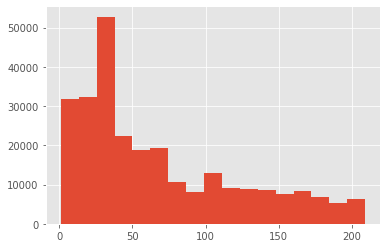

In [104]:
# examine distribution of policy count
plt.hist(df.loc[:, 'relationsamongemployees':].sum(axis=1), bins=17);

In [105]:
# focusing only on executive comp review
# how many organizations have controls in place for this
df.loc[:, 'ceo_comp_review'].sum()

111942

In [106]:
# focusing only on officer comp review
# how many organizations have controls in place for this
df.loc[:, 'officer_comp_review'].sum()

78520

Fewer organizations have controls for officer compensation compared with ceo compensation.

### Export Governance Features

In [101]:
df.head()

,ein,tax_yr,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,relationsamongemployees,delegate_management,material_diversion,memb_or_stockholder,memb_elect_board,decisions_outside_board,govern_body_minutes,committee_minutes,no_officer_address,local_chapt,990_to_members,conflict_interest_policy,conflict_disclosure,enforce_conflict_policy,whistleblower_policy,doc_retention_policy,ceo_comp_review,officer_comp_review,in_joint_venture,gov_cluster_labels
367394,996086871,2017,2,0,0,0,140000,False,True,False,False,False,False,True,False,False,False,True,True,True,True,False,True,True,False,False,128
1063015,996078252,2016,4,2,0,0,0,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,42
224160,996064620,2016,3,3,0,0,281890,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,False,147
30093,996057064,2016,3,3,0,3,0,True,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,42
474326,996048710,2016,3,3,0,0,104995,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,106


In [102]:
# select features to export
pd.concat([df.loc[:,'ein'],
           df.loc[:, 'voting_memb_ct' : 'salaries_expense_tot_curyr'],
           df.loc[:, ['ceo_comp_review', 'officer_comp_review']],
           df.loc[:, 'relationsamongemployees':].sum(axis=1).rename('count_of_controls'),
           df.loc[:,'gov_cluster_labels']
          ], axis=1)

,ein,voting_memb_ct,voting_indepmemb_ct,employee_tot_ct,volunteer_tot_ct,salaries_expense_tot_curyr,ceo_comp_review,officer_comp_review,count_of_controls,gov_cluster_labels
367394,996086871,2,0,0,0,140000,True,False,136.0,128
1063015,996078252,4,2,0,0,0,False,False,46.0,42
224160,996064620,3,3,0,0,281890,True,True,158.0,147
30093,996057064,3,3,0,3,0,False,False,46.0,42
474326,996048710,3,3,0,0,104995,True,True,110.0,106
...,...,...,...,...,...,...,...,...,...,...
1368372,10019705,11,9,6,9,78462,True,False,26.0,15
111381,10018930,60,56,10,0,247387,False,False,69.0,65
1054428,10018927,9,9,10,0,58990,False,False,108.0,102
168672,10018923,10,0,12,0,74592,False,False,109.0,105


In [103]:
# export data
pd.concat([df.loc[:,'ein'],
           df.loc[:, 'voting_memb_ct' : 'salaries_expense_tot_curyr'],
           df.loc[:, ['ceo_comp_review', 'officer_comp_review']],
           df.loc[:, 'relationsamongemployees':].sum(axis=1).rename('count_of_controls'),
           df.loc[:,'gov_cluster_labels']
          ], axis=1).to_csv('02.data/gov_features.csv', index=False, header=True)